# MScFE 690 Capstone
## Applying Algorithmic Generative Modeling for Detecting High Order Dependencies between stocks
Cellular Automata as Algorithmic Generative Model using Algorithmic Information Dynamics in the study of Cross-Sectional Ranking and High Order Dependencies between stocks

---

## Data Engineering

### Connect to Google Drive for price data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/Capstone/data

/content/drive/MyDrive/Colab Notebooks/Capstone/data


### Imports and Settings

In [ ]:
pip install git+https://github.com/sztal/pybdm.git

  Cloning https://github.com/sztal/pybdm.git to /tmp/pip-req-build-97l35bui
  Running command git clone --filter=blob:none --quiet https://github.com/sztal/pybdm.git /tmp/pip-req-build-97l35bui
  Resolved https://github.com/sztal/pybdm.git to commit 4bedea1200998a8978ada1a708b4e1f98aacb2d8
  Preparing metadata (setup.py) ... done
  Created wheel for pybdm: filename=pybdm-0.1.0-py2.py3-none-any.whl size=39933846 sha256=ba6c2c66b9e14d1872296d6c4dbb495024ad0bbe5e2cc41d0cf870f3f5c0a21a
  Stored in directory: /tmp/pip-ephem-wheel-cache-x8v0uoma/wheels/67/6e/1c/64fedb780569cd521fe6933032437f99c23618d9d40ad769fd
Successfully built pybdm


In [ ]:
from pybdm import BDM
import pybdm
from sklearn.decomposition import PCA

pybdm.options.set(raise_if_zero=False)

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Set Data Store path

In [ ]:
DATA_STORE = Path('stocks.h5')

wiki_prices.csv is available at https://osf.io/659ed/files/osfstorage

In [ ]:
df = (pd.read_csv('wiki_prices.csv',
                 parse_dates=['date'],
                 index_col=['date', 'ticker'],
                 infer_datetime_format=True)
     .sort_index())

print(df.info(null_counts=True))
with pd.HDFStore(DATA_STORE) as store:
    store.put('quandl/wiki/prices', df)

<ipython-input-6-7ad14f8565c0>:7: FutureWarning: null_counts is deprecated. Use show_counts instead
  print(df.info(null_counts=True))


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 15389314 entries, (Timestamp('1962-01-02 00:00:00'), 'ARNC') to (Timestamp('2018-03-27 00:00:00'), 'ZUMZ')
Data columns (total 12 columns):
 #   Column       Non-Null Count     Dtype  
---  ------       --------------     -----  
 0   open         15388776 non-null  float64
 1   high         15389259 non-null  float64
 2   low          15389259 non-null  float64
 3   close        15389313 non-null  float64
 4   volume       15389314 non-null  float64
 5   ex-dividend  15389314 non-null  float64
 6   split_ratio  15389313 non-null  float64
 7   adj_open     15388776 non-null  float64
 8   adj_high     15389259 non-null  float64
 9   adj_low      15389259 non-null  float64
 10  adj_close    15389313 non-null  float64
 11  adj_volume   15389314 non-null  float64
dtypes: float64(12)
memory usage: 1.4+ GB
None


In [ ]:
df['ticker']

In [ ]:
tickers = ['AAPL', 'BA', 'CAT', 'DIS', 'GE', 'IBM', 'MSFT', 'TSLA']
df1 = df.adj_close.unstack('ticker').loc['2018':'2020', tickers]
df1

ticker,AAPL,BA,CAT,DIS,GE,IBM,MSFT,TSLA
date,,,,,,,,
2018-01-02,172.260,296.84,157.04,111.80,17.980,154.25,85.95,320.5300
2018-01-03,172.230,297.80,157.28,112.28,18.150,158.49,86.35,317.2500
2018-01-04,173.030,296.67,159.44,112.23,18.530,161.70,87.11,314.6200
2018-01-05,175.000,308.84,161.96,111.62,18.540,162.49,88.19,316.5800
2018-01-08,174.350,310.15,166.03,110.02,18.280,163.47,88.28,336.4100
2018-01-09,174.330,318.43,166.43,109.94,18.560,163.83,88.22,333.6900
2018-01-10,174.290,320.26,165.87,109.47,18.929,164.18,87.82,334.8000
2018-01-11,175.280,328.12,169.20,110.99,19.020,164.20,88.08,337.9500
2018-01-12,177.090,336.21,170.30,112.47,18.760,163.14,89.58,336.2200


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2018-01-02 to 2018-03-27
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BA      59 non-null     float64
 1   IBM     59 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB


### Encode change in prices in 0/1 bit

In [ ]:
df1['AAPL Change'] = df1['AAPL'].pct_change()
df1['BA Change'] = df1['BA'].pct_change()
df1['CAT Change'] = df1['CAT'].pct_change()
df1['DIS Change'] = df1['DIS'].pct_change()
df1['GE Change'] = df1['GE'].pct_change()
df1['IBM Change'] = df1['IBM'].pct_change()
df1['MSFT Change'] = df1['MSFT'].pct_change()
df1['TSLA Change'] = df1['TSLA'].pct_change()


In [ ]:
# Encode price changes as 1/0 series

df1.loc[df1['AAPL Change'] > 0, 'AAPL Change'] = 1
df1.loc[df1['AAPL Change'] <= 0, 'AAPL Change'] = 0

df1.loc[df1['BA Change'] > 0, 'BA Change'] = 1
df1.loc[df1['BA Change'] <= 0, 'BA Change'] = 0

df1.loc[df1['CAT Change'] > 0, 'CAT Change'] = 1
df1.loc[df1['CAT Change'] <= 0, 'CAT Change'] = 0

df1.loc[df1['DIS Change'] > 0, 'DIS Change'] = 1
df1.loc[df1['DIS Change'] <= 0, 'DIS Change'] = 0

df1.loc[df1['GE Change'] > 0, 'GE Change'] = 1
df1.loc[df1['GE Change'] <= 0, 'GE Change'] = 0

df1.loc[df1['IBM Change'] > 0, 'IBM Change'] = 1
df1.loc[df1['IBM Change'] <= 0, 'IBM Change'] = 0

df1.loc[df1['MSFT Change'] > 0, 'MSFT Change'] = 1
df1.loc[df1['MSFT Change'] <= 0, 'MSFT Change'] = 0

df1.loc[df1['TSLA Change'] > 0, 'TSLA Change'] = 1
df1.loc[df1['TSLA Change'] <= 0, 'TSLA Change'] = 0



In [ ]:
#tickers = ['AAPL', 'BA', 'CAT', 'DIS', 'GE', 'IBM', 'MSFT', 'TSLA']

# Convert to strings
strings = []
for date, aapl, ba, cat, dis, ge, ibm, msft, tsla in zip(df1.index.date,
    df1['AAPL Change'], df1['BA Change'], df1['CAT Change'], df1['DIS Change'],
    df1['GE Change'], df1['IBM Change'], df1['MSFT Change'], df1['TSLA Change']):
    strings.append(str(date) + str(int(aapl > 0)) + str(int(ba > 0)) + str(int(cat > 0)) +
                                str(int(dis > 0)) + str(int(ge > 0)) + str(int(ibm > 0)) +
                                str(int(msft > 0)) + str(int(tsla > 0)) )

In [ ]:
strings

['2018-01-0200000000',
 '2018-01-0301111110',
 '2018-01-0410101110',
 '2018-01-0511101111',
 '2018-01-0801100111',
 '2018-01-0901101100',
 '2018-01-1001001101',
 '2018-01-1111111111',
 '2018-01-1211110010',
 '2018-01-1600000101',
 '2018-01-1711010111',
 '2018-01-1810100100',
 '2018-01-1900110001',
 '2018-01-2201110111',
 '2018-01-2310001111',
 '2018-01-2400010000',
 '2018-01-2501110110',
 '2018-01-2611010111',
 '2018-01-2900001001',
 '2018-01-3000100000',
 '2018-01-3111001111',
 '2018-02-0111010000',
 '2018-02-0200000000',
 '2018-02-0500000000',
 '2018-02-0611111110',
 '2018-02-0701000001',
 '2018-02-0800000000',
 '2018-02-0911111110',
 '2018-02-1211110111',
 '2018-02-1310110011',
 '2018-02-1411111110',
 '2018-02-1511110111',
 '2018-02-1600011101',
 '2018-02-2000000010',
 '2018-02-2100000000',
 '2018-02-2211111011',
 '2018-02-2311110111',
 '2018-02-2611111111',
 '2018-02-2701000000',
 '2018-02-2800000000',
 '2018-03-0100000000',
 '2018-03-0210011111',
 '2018-03-0511111110',
 '2018-03-0

## Evolution of ECA Space-Time diagrams
---

Reference: Rule Primality, Minimal Generating Sets, Turing-Universality and Causal Decomposition in Elementary Cellular Automata

### Apply 88 essential ECA rules to generate test data from initial strings
---

In [ ]:
pip install git+https://github.com/lantunes/cellpylib.git

  Cloning https://github.com/lantunes/cellpylib.git to /tmp/pip-req-build-x4qf1kgs
  Running command git clone --filter=blob:none --quiet https://github.com/lantunes/cellpylib.git /tmp/pip-req-build-x4qf1kgs
  Resolved https://github.com/lantunes/cellpylib.git to commit 743e936d48f8520f6f4ac652570ac7bb46414189
  Preparing metadata (setup.py) ... done
  Created wheel for cellpylib: filename=cellpylib-2.4.0-py3-none-any.whl size=37928 sha256=76990d50c931ce8781e675a920974167c17d0f489692f977dfff077b9c52580e
  Stored in directory: /tmp/pip-ephem-wheel-cache-eoae9taw/wheels/33/9c/95/2f801091f0c1a3e71e37af261dd977e384a20710ac04c7cf5f
Successfully built cellpylib


In [ ]:
s = strings[1]

# Length of date part
DATE_LEN = 10

# Split string on date length
date = s[:DATE_LEN]
encoded_data = s[DATE_LEN:]

In [3]:
encoded_data = '01111110'

In [2]:
encoded_data

NameError: ignored

In [10]:
# Pad encoded_data with zeros for better visualisation
# Initial encoded data
encoded_data = '01111110'

# Define total length
total_len = 192

# Calculate padding needed on each side
pad_len = (total_len - len(encoded_data)) // 2

# Create padding strings
left_pad = '0' * pad_len
right_pad = '0' * pad_len

# Join and pad the encoded data
padded_data = left_pad + encoded_data + right_pad

print(padded_data)

000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000111111000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


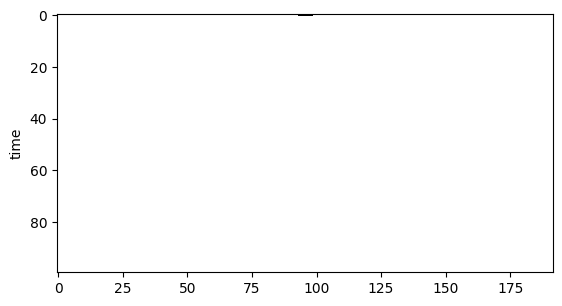

In [5]:
import numpy as np
import cellpylib as cpl

# Convert encoded data to list of ints
int_list = [int(bit) for bit in padded_data]

# List of 88 prime ECA rules
rules = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 50, 51, 54, 56, 57, 58, 60, 62, 72, 73, 74, 76, 77, 78, 90, 94, 104, 105, 106, 108, 110, 122, 126, 128, 130, 132, 134, 136, 138, 140, 142, 146, 150, 152, 154, 156, 160, 162, 164, 168, 170, 172, 178, 184, 200, 204, 232]

# Initialize CAs list
CAs_list = []

# Initialize CA with encoded data
cellular_automaton = np.array([int_list], dtype=int)

# Iterate over each ECA rule and evolve CA for 100 timesteps
for rule in rules:
   ca = cpl.evolve(cellular_automaton, timesteps=100, apply_rule=cpl.NKSRule(rule))
   CAs_list.append(ca)

#print(cellular_automaton)
cpl.plot(CAs_list[0])

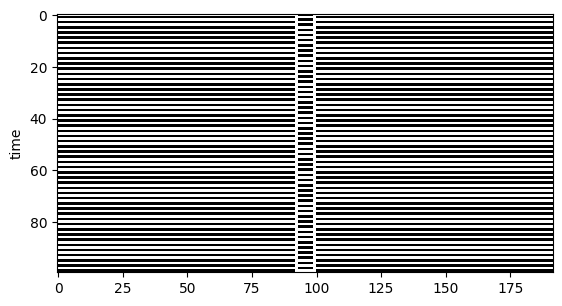

In [9]:
cpl.plot(CAs_list[1])

In [7]:
print(CAs_list[1])

[[0 0 0 ... 0 0 0]
 [1 1 1 ... 1 1 1]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [0 0 0 ... 0 0 0]
 [1 1 1 ... 1 1 1]]


### PyMILS class definition
---

In [11]:
# Alyssa M Adams, Sept 2020

from pybdm import BDM
import random
import networkx as nx
import numpy as np
from operator import itemgetter
from itertools import groupby

import pybdm
pybdm.options.set(raise_if_zero=False)


# the MILS algorithm:
# 1. measure BDM of matrix
# 2. Remove a row or column that keeps the BDM to the closest value
# 3. Repeat

# Try with random deletion
# Then try SVM and random trees

class PyMILS:

    # image := matrix of binary values, a list of lists

    def init_bdm(self):

        '''
        Initialize the bdm class for 2 dimensions and 2 symbols
        :return: bdm class
        '''

        bdm = BDM(ndim=2)

        return bdm

    def image_bdm(self, image, bdm_tool):

        '''
        Returns the BDM of a matrix
        :param image: List of lists
        :param bdm_tool: List of lists
        :return: float
        '''

        bdm = bdm_tool.bdm(image)

        return bdm

    def image_subsets_complete(self, image):

        '''
        Makes all possible subsets of a particular graph
        :param image: list of lists
        :return: dict of lists of lists (index of matrices)
        '''

        subsets = {}

        # index the cells for dev purposes
        size = len(image)
        image = list(zip(*(iter(range(size**2)),) * size))
        image = np.array(image)

        # at each step we need to take a row or a cell while there are 2 or more of each option
        # if there's only one row or cell, can't take, so choice is to take the one that is bigger than 1

        # some quick math of how many choices are made for a matrix of this size
        #max_size = 10
        #n_choices = dict(zip(range(2, max_size), range(1, max_size*2, 2)))
        #n_choices = n_choices[size]

        start_images = [image]
        choice_number = 0

        while len(start_images) > 0:

            subsets[choice_number] = {}

            # for each image in the start nodes at choice number t
            for start_image in start_images:

                subsets[choice_number][str(start_image.tolist())] = {}

                # These are the two possible choices
                choices = [0, 1]  # row and column, respectively

                # for each choice
                for choice in choices:

                    # check if the number of columns or rows (whichever is going to be deleted) is bigger than 4
                    # (pybdm doesn't measure anything smaller than 4x4)
                    num_rows, num_cols = start_image.shape

                    if choice == 0:
                        n_objects = num_rows
                        n_other = num_cols
                    else:
                        n_objects = num_cols
                        n_other = num_rows

                    # if so, then delete an object
                    if n_objects >= 4 and n_other >= 4:

                        final_images = []

                        for index_to_remove in range(n_objects):

                            final_image = np.delete(start_image, index_to_remove, axis=choice)

                            # save these
                            final_images.append(final_image)

                        subsets[choice_number][str(start_image.tolist())][choice] = final_images

                    else:
                        continue

            # update the choice number and get the set of new start images
            choice_number += 1
            last_level = subsets[list(subsets.keys())[-1]]

            start_images = []

            for key in last_level.keys():

                # grab and merge from both choices at each step
                if 0 in last_level[key].keys():
                    choice_0_results = last_level[key][0]
                else:
                    choice_0_results = []
                if 1 in last_level[key].keys():
                    choice_1_results = last_level[key][1]
                else:
                    choice_1_results = []

                start_images.append(choice_0_results + choice_1_results)

            start_images = [item for sublist in start_images for item in sublist]

        return subsets

    def batch_image_bdms(self, subsets, image):

        '''
        Measures the BDMs of all possible subsets
        :param subsets: dict of lists of lists (index of matrices)
        :param image: Matrix, this image gets to be mapped onto the indexed subsets
        :return: dict for the index of bdms
        '''

        # make the dict of matrix coords to map back onto
        image_size = len(image)
        cells = image_size**2
        coords = []
        for i in range(image_size):
            for j in range(image_size):
                coords.append((i, j))
        coords = dict(zip(range(cells), coords))

        # load in the BDM object
        bdm_tool = self.init_bdm()
        bdms = {}

        # measure all the BDMs
        for step in subsets.keys():
            for start_image in subsets[step].keys():
                for choice in subsets[step][start_image].keys():
                    for resulting_image in subsets[step][start_image][choice]:

                        # check if resulting image is at least 4x4
                        num_rows, num_cols = resulting_image.shape
                        if num_rows >= 4 and num_cols >= 4:

                            # map image onto index
                            mapped_resulting_image = []

                            for row in resulting_image:
                                mapped_row = []
                                for cell in row:
                                    data_coords = coords[cell]
                                    mapped_cell = image[data_coords[0]][data_coords[1]]
                                    mapped_row.append(mapped_cell)
                                mapped_resulting_image.append(mapped_row)

                            mapped_resulting_image = np.array(mapped_resulting_image)
                            bdm = self.image_bdm(mapped_resulting_image, bdm_tool)
                            bdms[str(resulting_image.tolist())] = {'bdm': bdm, 'state': str(mapped_resulting_image.tolist())}

                        else:  # skip because isn't large enough
                            continue

        return bdms

    def subset_state_space(self, subsets, subset_bdms, image_bdm):

        '''
        Returns a graph with vertices as matrices and edges as single-deletion possible transitions
        :param subsets: dict of lists of lists (index of matrices)
        :return: nx graph
        '''

        g = nx.DiGraph()

        # go through all the levels of subsets and add edges to network
        for step in subsets.keys():
            for start_image in subsets[step].keys():
                for choice in subsets[step][start_image].keys():
                    for resulting_image in subsets[step][start_image][choice]:

                        # check if resulting image is at least 4x4
                        num_rows, num_cols = resulting_image.shape
                        if num_rows >= 4 and num_cols >= 4:

                            # check to see if this is the first one, because need to add initial image edges
                            if step == 0:
                                root_node = str(image_bdm[0])
                                root_bdm = image_bdm[1]
                                out_node = subset_bdms[str(resulting_image.tolist())]['state']
                                out_bdm = subset_bdms[str(resulting_image.tolist())]['bdm']

                            else:
                                root_node = subset_bdms[start_image]['state']
                                root_bdm = subset_bdms[start_image]['bdm']
                                out_node = subset_bdms[str(resulting_image.tolist())]['state']
                                out_bdm = subset_bdms[str(resulting_image.tolist())]['bdm']

                            g.add_edge(root_node, out_node)
                            g.add_node(root_node, weight=root_bdm)
                            g.add_node(out_node, weight=out_bdm)

        return g

    def all_path_bdms(self, statespace):

        """
        Gets all the possible paths from initial image to each leaf and gets the BDM difference at each step
        :param statespace: a nx graph
        :return: a dict of {(rootnode, leafnode): path: bdm_diffs}
        """

        paths = {}

        # get a list of all leaf nodes
        leaf_nodes = [x for x in statespace.nodes() if statespace.out_degree(x) == 0 and statespace.in_degree(x) > 0]
        root_node = [n for n, d in statespace.in_degree() if d==0][0]

        # loop through all the leaf nodes
        for leaf in leaf_nodes:

            paths[(root_node, leaf)] = {}

            all_a_to_b_paths = nx.all_simple_paths(statespace, source=root_node, target=leaf)

            for path in all_a_to_b_paths:
                bdms = [statespace.nodes[node]['weight'] for node in path]
                diffs = np.diff(bdms)

                # change path to list of lists, not nd arrays (for loading back in from string)
                paths[(root_node, leaf)][str(path)] = diffs

        return paths

    def mils(self, img, min_size, bdm_tool, sampling, chunk_size):  # TODO: Add min complexity cutoff?

        '''
        Takes an image, randomly picks if it will remove a row or column, then removes a random one of that choice
        :param image: list of lists: matrix of binary values that is an image
        :param min_size: 0-1 Minimum final image size (cannot be smaller than 4 though)
        :param sampling: float 0-1, percent of rows/columns to sample possible next steps
        :return: final image
        '''

        # part 1 is very fast for small images but way too slow for larger ones
        # but parts 2 3 tell us that we can just randomly pick paths so we don't need to calculate all possible paths

        # 0 = row, 1 = column

        # get size information of original image
        size = np.array(img).shape
        min_pixels = int(min_size*min(size))
        rounded_aspect_ratio = int(max(size)/min(size))

        # get coords of bottom right pixel of upper left quadrant (for experimental verification)
        mid_coordinates = (round(size[0]/2), round(size[1]/2))

        # pre-compute the row and column deletion order to preserve the aspect ratio
        # row = 0, column = 1
        min_rows = int(min_size*size[0])
        n_row_deletions = int((size[0]-min_rows)/4)
        min_columns = int(min_size*size[1])
        n_column_deletions = int((size[1]-min_columns)/4)
        total_deletions = n_row_deletions + n_column_deletions

        # change symbol every rounded_aspect_ratio th element
        # determine which element to start with
        if rounded_aspect_ratio != 1 and n_row_deletions > n_column_deletions:  # if there are more rows to delete
            start_choice = 0
        elif rounded_aspect_ratio == 1:  # 1:1 aspect ratio can start with rows by default
            start_choice = 0
        else:  # not 1:1 and more column deletions, start with columns
            start_choice = 1

        # this is the list the algorithm will follow to make deletions and preserve the aspect ratio
        deletions = []
        for i in range(total_deletions):
            if i % (rounded_aspect_ratio+1) == 0:  # append, then flip which one we add
                if start_choice == 1:
                    choice = 0
                else:
                    choice = 1
                deletions.append(choice)
            else:
                deletions.append(start_choice)

        # starting image complexity
        bdm_start = self.image_bdm(np.array(img), bdm_tool)

        # make sure the image is large enough
        if min_pixels < 4:
            print("min_size gives less than 4 pixels! Pick a larger size. (BDM doesn't measure anything smaller than a 4x4 matrix)")
            quit()


        # make sure the image is still big enough
        # while it is, do this loop and take out rows and columns
        #while size[0] > min_pixels and size[1] > min_pixels:

        for choice in deletions:

            # randomly pick sampling proportion of indexes from choice
            n_indices = size[choice]
            sampling_indices = random.sample(range(n_indices), int(sampling*n_indices))

            # loop through each potential index to remove and pick the one with the closest bdm value
            bdm_sample_results = []

            for i in sampling_indices:

                # remove the index
                if choice == 0:  # remove rows in chunks of 4
                    if i > len(img)-chunk_size:  # check for boundary wrap-around
                        img_sample = img[i % chunk_size:i]
                    else:
                        img_sample = img[:i] + img[i+chunk_size:]
                else:  # removes columns
                    if i > len(img[0]) - chunk_size:  # check for boundary wrap-around
                        img_sample = list(map(lambda x: x[i % chunk_size:i], img))
                    else:
                        img_sample = list(map(lambda x: x[:i] + x[i + chunk_size:], img))

                # get the resulting bdm
                bdm_sample = self.image_bdm(np.array(img_sample), bdm_tool)
                bdm_sample_results.append((i, bdm_sample))

            # pick the index with the closest bdm value (if multiple, just pick the first one)
            bdm_sample_results = list(map(lambda x: (x[0], abs(x[1]-bdm_start)), bdm_sample_results))
            bdm_sample_results = sorted(bdm_sample_results, key=lambda x: x[1])

            # if there are more than one indices that result in a change of 0, just pick a random
            grouped_indices = [[i for i, j in temp] for key, temp in groupby(bdm_sample_results, key=itemgetter(1))]
            index_to_remove = random.choice(grouped_indices[0])

            # remove the index
            if choice == 0:
                if index_to_remove > len(img) - chunk_size:  # check for boundary wrap-around
                    img = img[index_to_remove % chunk_size:index_to_remove]
                else:
                    img = img[:index_to_remove] + img[index_to_remove + chunk_size:]
            else:
                if index_to_remove > len(img[0]) - chunk_size:  # check for boundary wrap-around
                    img = list(map(lambda x: x[index_to_remove % chunk_size:index_to_remove], img))
                else:
                    img = list(map(lambda x: x[:index_to_remove] + x[index_to_remove + chunk_size:], img))

            # reset the size to check if size is big enough
            size = np.array(img).shape

            # see if the "center" moved. don't forget about the chunk size!
            # 0 = row, 1 = column
            if choice == 0:
                if index_to_remove < mid_coordinates[0]:
                    # check to see if the chunk overlaps with the middle
                    overlap = mid_coordinates[0] - index_to_remove
                    if overlap < chunk_size:
                        overlap = overlap
                    else:
                        overlap = chunk_size
                    mid_coordinates = (mid_coordinates[0]-overlap, mid_coordinates[1])
            else:
                if index_to_remove < mid_coordinates[1]:
                    # check to see if the chunk overlaps with the middle
                    overlap = mid_coordinates[1] - index_to_remove
                    if overlap < chunk_size:
                        overlap = overlap
                    else:
                        overlap = chunk_size
                    mid_coordinates = (mid_coordinates[0], mid_coordinates[1]-overlap)

        return img, mid_coordinates

### Apply MILS on generated CAs
---

In [12]:
len(CAs_list)

88

In [13]:
PyMILS = PyMILS()
bdm_tool = PyMILS.init_bdm()
sampling = 0.5 # downs
chunk_size = 10 # a trade-off between performance vs quality
min_size = 0.5

CAs_results = {}

for i, ca in enumerate(CAs_list):

  # Get initial BDM complexity
  initial_bdm = bdm_tool.bdm(ca)

  # Run pyMILS
  compressed_ca, _ = PyMILS.mils(ca, min_size, bdm_tool, sampling, chunk_size)

  # Get final BDM complexity
  final_bdm = bdm_tool.bdm(compressed_ca)

  # Save results
  CAs_results[i] = {
    'image': i,                    # image number
    'trial': 1,                    # trial number
    'initial_bdm': initial_bdm,    # initial BDM complexity
    'final_bdm': final_bdm,        # final BDM complexity
    'area': 'whole',               # area type
    'method': 'pymils',            # compression method
    'eca_rule': CA_rule,           # ECA rule
    'compressed_ca': compressed_ca # compressed CA
}

ValueError: ignored

In [ ]:
# initialize PyMILS
PyMILS = PyMILS()
bdm_tool = PyMILS.init_bdm()
sampling = 2 # downsample by 2x in each dimension
chunk_size = 10 # a trade-off between performance vs quality

# Convert CAs to 2D arrays for pyMILS
CAs_2d = [ca.reshape(ca.shape[0], -1) for ca in CAs_list]

# Apply pyMILS
compressed_CAs = []
for ca in CAs_2d:
  compressed = pymils.mils(ca, min_size=5)
  compressed_CAs.append(compressed)

# Calculate complexity of original and compressed CAs
original_complexity = [pymils.bdm(ca) for ca in CAs_2d]
compressed_complexity = [pymils.bdm(ca) for ca in compressed_CAs]

# Compare complexity
for i in range(len(rules)):
  print("Rule:", rules[i])
  print("Original complexity:", original_complexity[i])
  print("Compressed complexity:", compressed_complexity[i])
  print()

# Identify rules with best compression
best_rules = []
for i in range(len(rules)):
  if compressed_complexity[i] <= 0.75 * original_complexity[i]:
    best_rules.append(rules[i])

print("Best matching rules:", best_rules)

# References

1. https://github.com/sztal/pybdm
2. https://github.com/alyssa-adams/pymils
3. https://style.mla.org/citing-source-code/


---